In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('DatasetML.csv')

## Exploração Inicial

In [5]:
df.head()

,C1,N1,C2,C3,N2,C4,C5,N3,C5.1,C6,...,C7,N5,C8,C9,N6,C10,N7,C11,C12,LABEL
0,Z11,6,Z34,Z43,1169,Z65,Z75,4,Z93,Z101,...,Z121,67,Z143,Z152,2,Z173,1,Z192,Z201,1
1,Z12,48,Z32,Z43,5951,Z61,Z73,2,Z92,Z101,...,Z121,22,Z143,Z152,1,Z173,1,Z191,Z201,2
2,Z14,12,Z34,Z46,2096,Z61,Z74,2,Z93,Z101,...,Z121,49,Z143,Z152,1,Z172,2,Z191,Z201,1
3,Z11,42,Z32,Z42,7882,Z61,Z74,2,Z93,Z103,...,Z122,45,Z143,Z153,1,Z173,2,Z191,Z201,1
4,Z11,24,Z33,Z40,4870,Z61,Z73,3,Z93,Z101,...,Z124,53,Z143,Z153,2,Z173,2,Z191,Z201,2


In [6]:
df.shape

(1000, 21)

In [7]:
df['LABEL'].value_counts()

1    700
2    300
Name: LABEL, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
C1       1000 non-null object
N1       1000 non-null int64
C2       1000 non-null object
C3       1000 non-null object
N2       1000 non-null int64
C4       1000 non-null object
C5       1000 non-null object
N3       1000 non-null int64
C5.1     1000 non-null object
C6       1000 non-null object
N4       1000 non-null int64
C7       1000 non-null object
N5       1000 non-null int64
C8       1000 non-null object
C9       1000 non-null object
N6       1000 non-null int64
C10      1000 non-null object
N7       1000 non-null int64
C11      1000 non-null object
C12      1000 non-null object
LABEL    1000 non-null int64
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [9]:
categorical_cols = [x for x in list(df) if x[0] == 'C']
numerical_cols = [x for x in list(df) if x[0] == 'N']

In [10]:
df[categorical_cols].head()

,C1,C2,C3,C4,C5,C5.1,C6,C7,C8,C9,C10,C11,C12
0,Z11,Z34,Z43,Z65,Z75,Z93,Z101,Z121,Z143,Z152,Z173,Z192,Z201
1,Z12,Z32,Z43,Z61,Z73,Z92,Z101,Z121,Z143,Z152,Z173,Z191,Z201
2,Z14,Z34,Z46,Z61,Z74,Z93,Z101,Z121,Z143,Z152,Z172,Z191,Z201
3,Z11,Z32,Z42,Z61,Z74,Z93,Z103,Z122,Z143,Z153,Z173,Z191,Z201
4,Z11,Z33,Z40,Z61,Z73,Z93,Z101,Z124,Z143,Z153,Z173,Z191,Z201


In [11]:
df[numerical_cols]

,N1,N2,N3,N4,N5,N6,N7
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


In [13]:
df.describe()

,N1,N2,N3,N4,N5,N6,N7,LABEL
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## Correlações

In [14]:
df.corr()

,N1,N2,N3,N4,N5,N6,N7,LABEL
N1,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
N2,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
N3,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
N4,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
N5,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
N6,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
N7,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
LABEL,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


A Coluna N2 tem uma correlação com N1 demasiado alta. Tipicamente, a remoção de colunas com grande correlação ajuda na performance de vários modelos, ao mesmo tempo que reduz o número de dimensões e aumenta a interpretabilidade.

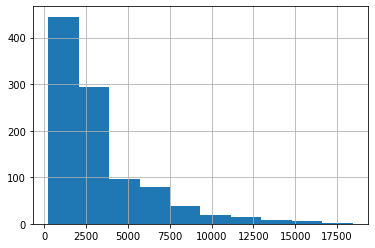

In [8]:
df['N2'].hist()

A coluna N2 possui também um elevado números diferentes - possivelmente um ID? - como tal, e tendo em conta a sua correlação alta, deverá ser descartada para diminuir a segmentaçao dos dados.

## Distribuição de Variáveis Categóricas

In [26]:
df.describe(include=['object'])

,C1,C2,C3,C4,C5,C5.1,C6,C7,C8,C9,C10,C11,C12
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,Z14,Z32,Z43,Z61,Z73,Z93,Z101,Z123,Z143,Z152,Z173,Z191,Z201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


Outra técnica que ajuda na performance de modelos de classificação, é a agregação dos valores de colunas categóricas. Isto ajuda a reduzir a segmentação da informação e aumenta a informação que o modelo pode adquirir.

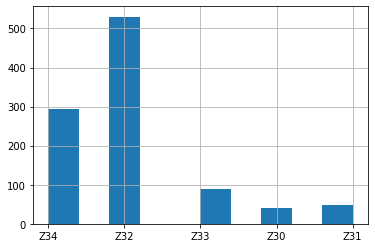

In [34]:
df['C2'].hist()

Para a variável C2, uma boa abordagem pode ser a substituição dos valores Z33, Z30 e Z31 pelo único valor Z33/Z30/Z31. A consequência desta abordagem é a redução nas escolhas por parte do utilizador final. É uma troca que deve ser discutida pelo cliente, de forma a avaliar qual o mais importante, se a performance do modelo, ou a informação que pode ser escolhida. Neste caso, sem acesso ao cliente final ou informação sobre o teor de cada coluna, vou optar por agrupar as seguintes colunas:

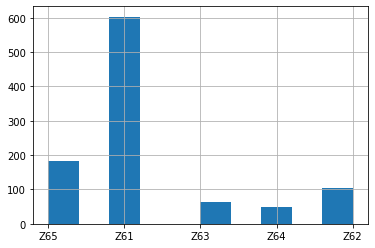

In [10]:
df['C4'].hist()

Z62/Z63/Z64/Z65: ['Z62', 'Z63', 'Z64', 'Z65']

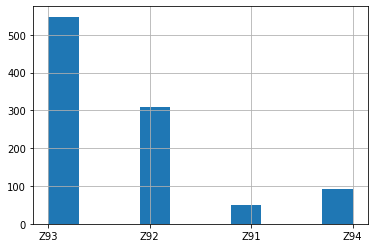

In [13]:
df['C5.1'].hist()

Z91/Z94: ['Z91', 'Z94']

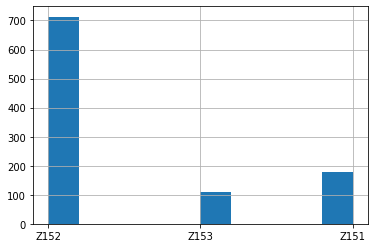

In [16]:
df['C9'].hist()

Z151/Z153: ['Z151', 'Z153']

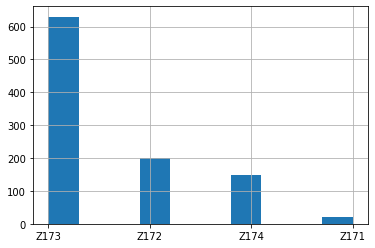

In [17]:
df['C10'].hist()

Z171/Z172/Z174: ['Z171', 'Z172', 'Z174']

## Outras técnicas

Outras técnicas que vou implementar:
    - Substituição da variável LABEL por uma binária;
    - Oversample da classe minoritária;
    - Substituição das variáveis categóricas usando One Hot Encoding;